In [519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [554]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\gui prj\adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Exploratory Data Analysis

In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Show that the income column can have two different values

In [556]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

Although isna function yields that there is no null values, show that workclass columns has null values encoded differently

In [557]:
df.isna().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

In [558]:
df.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

What percentage of rows do have null, i.e. '?', workclass entries?

In [559]:
null_workclass =  len(df[df.workclass == '?']) / len(df) *100
print(f'The workclass values for about {round(null_workclass)}% of rows are not entered')

The workclass values for about 6% of rows are not entered


Group the dataset by races with descending order

In [560]:
df.groupby('race').agg({'occupation': pd.Series.count}).sort_values(by='occupation', ascending=False)

,occupation
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


Display how many people there are in each seperate education category

In [561]:
education = df.groupby('education').size()
education.sort_values(ascending=False)

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
dtype: int64

How many countries are the people in our dataset from?

In [562]:
df['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [563]:
num_countries = len(df['native-country'].unique())
print(f"There are {num_countries -1} different countries, but the country values for some rows are not entered")

There are 41 different countries, but the country values for some rows are not entered


# Features and Labels

Let our features consist of age, and educational-num which is the number corresponding to the education level. Our label evidently is the income. Since our labels have to take numerical values, let's represent the income '<=50K' by 0, and '>50K' by 1.

In [564]:
df.loc[df.income == '<=50K', 'income'] = 0
df.loc[df.income == '>50K', 'income'] = 1

X = df.iloc[:, [0, 4]].values
y = df.iloc[:, -1].values
y = y.astype('int')

Split X and y into training and test sets

In [565]:
from sklearn.model_selection import train_test_split

In [566]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 0)

Rescale age feature through standardization

In [567]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fitting Our Model and Making Predictions

In [568]:
from sklearn.svm import SVC

SVM = SVC(kernel='rbf', random_state=0)
model = SVM.fit(X_train, y_train)

In [569]:
y_preds = SVM.predict(X_test)

What percantage of the test values are correctly estimated by our model?

In [570]:
correct = 0
for i in range(len(y_preds)):
    if y_preds[i] == y_test[i]:
        correct += 1
correct_perc = correct / len(y_preds) * 100        
print(f'Our model has predicted the test labels with around {round(correct_perc)}% accuracy.')

Our model has predicted the test labels with around 79% accuracy.


Plot the confusion matrix

In [571]:
from sklearn.metrics import confusion_matrix

labels = [0, 1]
cm = confusion_matrix(y_test, y_preds, labels=labels)
cm

array([[5175,  384],
       [1163,  605]], dtype=int64)

<AxesSubplot:>

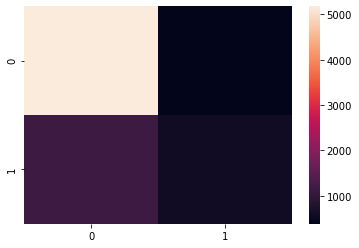

In [572]:
sns.heatmap(cm)

# Visualise the Training Set Results

In [573]:
from matplotlib.colors import ListedColormap

In [574]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [ ]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [ ]:
X.shape

In [ ]:
%history